In [75]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [60]:
all_user_ids = np.arange(1, 10001)  # генерим 10000 пользователей

all_product_ids = np.arange(1, 101)  # генерим 100 товаров

all_companies_names = np.array(['Сбербанк', 'Роснефть', 'Сургутнефтегаз', 'Газпром', 'Норникель'])

In [61]:
n = 10000

In [62]:
user_ids = np.random.choice(all_user_ids, n)  # рандомная выборка
product_ids = np.random.choice(all_product_ids, n)  # рандомная выборка
companies_names = np.random.choice(all_companies_names, n)

In [63]:
start_date = pd.to_datetime("2023-01-01")  # Начала отсчета

In [64]:
times = pd.date_range(start_date, periods=n, freq="1min")  # генерим время от /
# начала отсчета с переодичностью 1 минута 10000 раз

In [65]:
user_actions = pd.DataFrame(
    {"user_id": user_ids, "product_id": product_ids, "time": times, "company": companies_names}
)  # создание Дата Фрейма

In [66]:
user_actions["action"] = "view"

In [67]:
def generate_funnel_actions(user_id, product_id, time, company):
    to_cart = 0.2
    to_purchase = 0.4
    
    df = pd.DataFrame()
    
    if np.random.binomial(1, to_cart, 1)[0]:
        df = pd.DataFrame({
                            'user_id': user_id,
                            'product_id': product_id,
                            'time': time + pd.Timedelta(5, unit='s'),
                            'company': company,
                            'action': 'add to cart',}, index=[0])
        
        if np.random.binomial(1, to_purchase, 1)[0]:
            df_purchase = pd.DataFrame({
                            'user_id': user_id,
                            'product_id': product_id,
                            'time': time + pd.Timedelta(10, unit='s'),
                            'company': company,
                            'action': 'purchase'}, index=[0])
            df = df.append(df_purchase)
            
    return df


In [68]:
to_cart_df = pd.DataFrame()

In [69]:
for index, row in user_actions.iterrows():
    user_df = generate_funnel_actions(row["user_id"], row["product_id"], row["time"], row["company"])
    to_cart_df = to_cart_df.append(user_df)

In [70]:
to_cart_df

,user_id,product_id,time,company,action
0,772,78,2023-01-01 00:03:05,Сургутнефтегаз,add to cart
0,9571,1,2023-01-01 00:04:05,Норникель,add to cart
0,9571,1,2023-01-01 00:04:10,Норникель,purchase
0,8349,70,2023-01-01 00:06:05,Газпром,add to cart
0,8349,70,2023-01-01 00:06:10,Газпром,purchase
...,...,...,...,...,...
0,9104,59,2023-01-07 22:15:05,Норникель,add to cart
0,4360,56,2023-01-07 22:20:05,Роснефть,add to cart
0,2312,69,2023-01-07 22:37:05,Роснефть,add to cart
0,2312,69,2023-01-07 22:37:10,Роснефть,purchase


In [71]:
user_actions = user_actions.append(to_cart_df)
user_actions = user_actions.sort_values('time')

In [72]:
user_actions['date'] = user_actions.time.dt.date

In [73]:
user_actions.company.unique()

array(['Сбербанк', 'Норникель', 'Роснефть', 'Сургутнефтегаз', 'Газпром'],
      dtype=object)

In [74]:
user_actions.head(20)

,user_id,product_id,time,company,action,date
0,8241,79,2023-01-01 00:00:00,Сбербанк,view,2023-01-01
1,1348,98,2023-01-01 00:01:00,Норникель,view,2023-01-01
2,8820,97,2023-01-01 00:02:00,Роснефть,view,2023-01-01
3,772,78,2023-01-01 00:03:00,Сургутнефтегаз,view,2023-01-01
0,772,78,2023-01-01 00:03:05,Сургутнефтегаз,add to cart,2023-01-01
4,9571,1,2023-01-01 00:04:00,Норникель,view,2023-01-01
0,9571,1,2023-01-01 00:04:05,Норникель,add to cart,2023-01-01
0,9571,1,2023-01-01 00:04:10,Норникель,purchase,2023-01-01
5,9556,80,2023-01-01 00:05:00,Роснефть,view,2023-01-01
6,8349,70,2023-01-01 00:06:00,Газпром,view,2023-01-01


In [24]:
 q ="""
 SELECT
     date,
     views,
     carts,
     purchases,
     100 * purchases / views as purchase_percantage
FROM (
    SELECT 
        date,
        count(case when action = 'view' then 1 else NULL end) as views,
        count(case when action = 'add to cart' then 1 else NULL end) as carts,
        count(case when action = 'purchase' then 1 else NULL end) as purchases
    FROM user_actions
    GROUP BY date);
"""

In [78]:
df = sqldf(q)
sqldf(q)

,date,views,carts,purchases,purchase_percantage
0,2023-01-01,1440,295,126,8
1,2023-01-02,1440,289,113,7
2,2023-01-03,1440,309,123,8
3,2023-01-04,1440,293,115,7
4,2023-01-05,1440,279,103,7
5,2023-01-06,1440,305,131,9
6,2023-01-07,1360,268,109,8


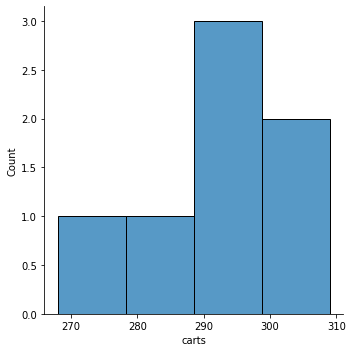

In [79]:
ax = sns.displot(df.carts)